# Indian Musical Instruments Classifier

### Import fastai library

In [1]:
from fastai import *
from fastai.vision import *

### Create directory and upload image files into server

In [2]:
path = Path('data/instruments')
dest = path
dest.mkdir(parents=True, exist_ok=True)

In [3]:
classes = ['bansuri','harmonium','mridangam','santoor','tabla','veena']

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

bansuri


/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


harmonium


/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


mridangam


/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


santoor


/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


tabla


veena


/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expres

### View data

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [6]:
data.classes

['bansuri', 'harmonium', 'mridangam', 'santoor', 'tabla', 'veena']

/home/nbuser/.anaconda3/lib/python3.7/site-packages/PIL/Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


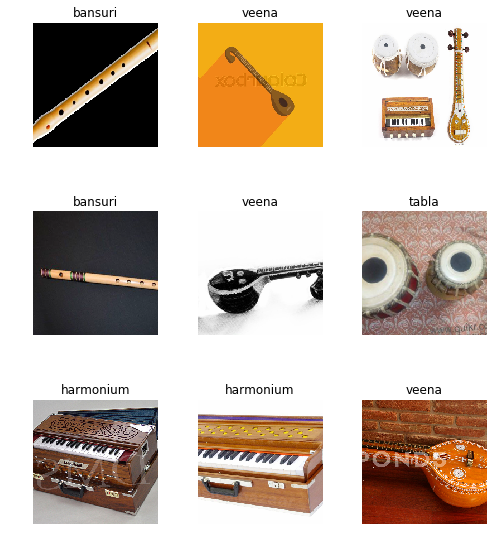

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bansuri', 'harmonium', 'mridangam', 'santoor', 'tabla', 'veena'],
 6,
 807,
 233)

### Train model

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

Total time: 01:01
epoch  train_loss  valid_loss  error_rate
1      1.233024    0.281974    0.072961    (00:17)
2      0.691831    0.236658    0.060086    (00:14)
3      0.487566    0.232319    0.060086    (00:14)
4      0.383938    0.227361    0.060086    (00:14)



In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


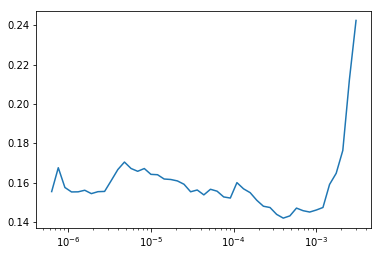

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:31
epoch  train_loss  valid_loss  error_rate
1      0.165191    0.231056    0.060086    (00:16)
2      0.143717    0.237134    0.064378    (00:14)



### Interpretation

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

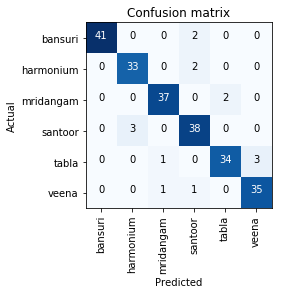

In [16]:
interp.plot_confusion_matrix()

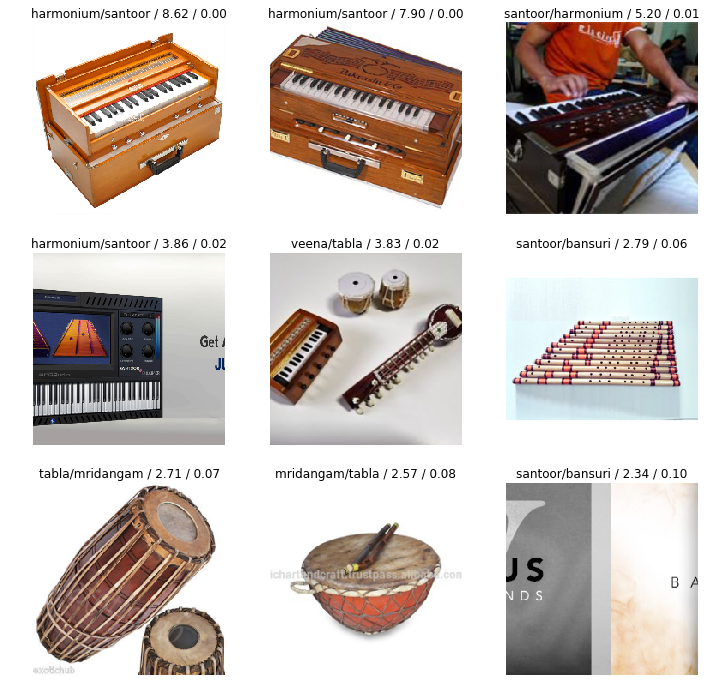

In [17]:
interp.plot_top_losses(9)

### Save the model

In [18]:
learn.save('model')